# Detect Motion

Detect if sensor's holder is moving.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import os
os.chdir("../")
from data_preprocessing.create_dataset import DatasetGlobalAcc

In [2]:
sequence_length = 10
batch_size = 1024

In [3]:
xtrain = DatasetGlobalAcc(sequence_length, batch_size, amplitude=1)
xtrain.add_dataframe(pd.read_csv("data/LBX_LOGS_2021-01-08_21-29_nothing.txt"))
xtrain.y += 2.
xtrain.add_folder("data/clean/")

In [4]:
df = pd.DataFrame(xtrain.x, columns=["a{}".format(_) for _ in range(sequence_length)])
m = np.max(df, axis=1)
for i in ["a{}".format(_) for _ in range(sequence_length)]:
    # Scale each row
    df[i] /= m

df["v"] = df.var(axis=1)
df["label"] = xtrain.y

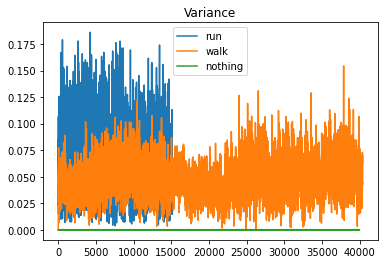

In [5]:
plt.plot(np.arange(np.where(df.label == 1.)[0].shape[0]), df.v.iloc[np.where(df.label == 1.)], label="run")
plt.plot(np.arange(np.where(df.label == 0.)[0].shape[0]), df.v.iloc[np.where(df.label == 0.)], label="walk")
plt.plot(np.arange(np.where(df.label == 2.)[0].shape[0]), df.v.iloc[np.where(df.label == 2.)], label="nothing")
plt.title("Variance")
_ = plt.legend()